# The 70's Chart

This notebook is dedicated to analyze the 70's decade chart. It is differed from the other charts in two ways: I didn't have an original decade chart to compare to, and I have only had the first 100 places available, there was no internal prioritizaion between songs who didn't make it into the top 100.

The 70's began at the hype of the Hippie movement. Woodstock Festival was just over, and the Beatles were making the final steps of their historic career with the release of the timeless album 'Let it be'. In 1971, after they separated, John Lennon has released perhaps the unofficial anthem of the Hippies – 'Imagine'. Vietnam war was over in 1975, and the Hippie movement was fading, as new voices emerged from Europe. Queen, Elton John and Abba have all released albums and singles that got international success with a new upbeat and poppy sound. The end of the century could be marked by the release of the movie 'Hair' in 1979 which showed the prime of the hippies and their struggle against Vietnam War. 
 
In the last couple of years numerous movies and musicals have tried to raise nostalgic feelings to those great artists. Successful musicals based on Abba and Queen are long running in Broadway and West End. The huge success of 'Bohemian Rhapsody', a movie based on the life of Freddie Mercury, the lead singer of Queen, was later joined by 'Rocket Man', based on the story of John Lennon, and 'Yesterday', which included many of the legendary Beatles songs. Looking at the [results](https://glz.co.il/%D7%92%D7%9C%D7%92%D7%9C%D7%A6/%D7%9B%D7%AA%D7%91%D7%95%D7%AA/%D7%9E%D7%A6%D7%A2%D7%93-%D7%A9%D7%A0%D7%95%D7%AA-%D7%94-70-%D7%94%D7%9E%D7%97%D7%95%D7%93%D7%A9), we can see many songs of these great artists. I was wondering what story the data would tell – How influential those movies were? Can the data reveal the musical story of this century?


In [2]:
import pandas as pd
import re
import numpy as np

# Data visualization
import seaborn as sns
import matplotlib.pyplot as plt

# Statistic test
import scipy.stats as st

In [3]:
seventies_df = pd.read_csv("DFs/united_seventies.csv")

In [4]:
print(seventies_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 497 entries, 0 to 496
Data columns (total 23 columns):
name                   497 non-null object
version_exists         497 non-null int64
artist                 497 non-null object
artist_first_letter    497 non-null object
year                   497 non-null int64
year_source            497 non-null object
song_popularity        497 non-null int64
artist_popularity      497 non-null int64
duration_ms            497 non-null int64
key                    497 non-null int64
time_signature         497 non-null int64
acousticness           497 non-null float64
danceability           497 non-null float64
energy                 497 non-null float64
instrumentalness       497 non-null float64
loudness               497 non-null float64
speechiness            497 non-null float64
valence                497 non-null float64
tempo                  497 non-null float64
genres                 497 non-null object
views                  497 non-nul

Let's have a brief review on some of the interesting features in this table:
1. <b>Version Exists</b> - Indicates whether the name of the song in spotify contained a reference to a specific version. My premise is that if such reference exists, it could indicate that the song is popular such as numerous versions have been created to it.
2. <b>Artist First Letter</b> - Created in order to identify whether the design of the voting website influenced any voting patterns.
3. <b>Year Source</b> - Because I indicated problems with the year tags from Spotify, I also scraped the tagging out of Wikipedia. Then, I checked which of these sources points at a year which is within the range of our decade. If no such tagging exists, I tagged the song manually. This field, therefore, recieves one of three possible values: "Spotify", "Wikipedia" or "Manual".
4. <b>Spotify Features</b> - All of the following features have been taken out of spotify using Spotify API, and they are well documented in it's website: song_popularity, artist_popularity, duration_ms, key, time_signature, acousticness, danceability, energy, instrumentalness, loudness, speechiness, valence, tempo.
5. <b>Genres</b> - Tagging of genres scraped from the Wikipedia entries of the songs. 
6. <b>Views</b> - A summary of the views of the song's Wikipedia page in 2019. If no such page exists, than this field would be 0.
7. <b>Old Chart Position</b> - The position of the song (if entered) in the original end-of-year charts in Israel.
8. <b>New Chart Location</b> - The position of the song in the renewed decade chart conducted by Glglz in Aug 19. If the song is not in the top 100, then it will show as 0.

Now let's go over these features and see how they distribute.

## Version Exists

In [5]:
version_exists = seventies_df.groupby('version_exists')
exists_df = []
for group in version_exists:
    category = {}
    category['name'] = group[0]
    category['count_songs'] = group[1]['name'].count()
    category['avg_popularity'] = group[1]['song_popularity'].mean()
    category['avg_artist_popularty'] = group[1]['artist_popularity'].mean()
    category['count_wikipedia'] = group[1].loc[group[1]['views'] > 0]['views'].count()
    category['wikipedia_percentage'] = group[1].loc[group[1]['views'] > 0]['views'].count() /  group[1]['name'].count()
    category['avg_views'] = group[1].loc[group[1]['views'] > 0]['views'].mean()
    category['count_old_chart'] = group[1].loc[group[1]['old_chart_position'] > 0]['old_chart_position'].count()
    category['old_chart_percentage'] = group[1].loc[group[1]['old_chart_position'] > 0]['old_chart_position'].count() / group[1]['name'].count()
    category['avg_new_chart'] = group[1].loc[group[1]['new_chart_location'] > 0]['new_chart_location'].mean()
    category['count_new_chart'] = group[1].loc[group[1]['new_chart_location'] > 0]['new_chart_location'].count()
    category['new_chart_percentage'] = group[1].loc[group[1]['new_chart_location'] > 0]['new_chart_location'].count() / group[1]['name'].count()
    exists_df.append(category)
exists_df = pd.DataFrame(exists_df)
display(exists_df)

,name,count_songs,avg_popularity,avg_artist_popularty,count_wikipedia,wikipedia_percentage,avg_views,count_old_chart,old_chart_percentage,avg_new_chart,count_new_chart,new_chart_percentage
0,0,404,54.772277,66.678218,379,0.938119,59185.907652,52,0.128713,53.816901,71,0.175743
1,1,93,61.817204,76.698925,92,0.989247,114720.402174,12,0.129032,38.769231,26,0.279570


We can see that 93 songs had a reference to a version in Spotify. This is a signifcant amount, which I would expect to descend as the charts will get more modern. It turns out that this parameter can be a somewhat useful - there are differences in all of the modern popularity features. The songs that contained a reference to a version were more popular in Spotify, came from more popular artists, had more Wikipedia views, and had a higher entrance percentage with higher average location at the new chart.

## Artist

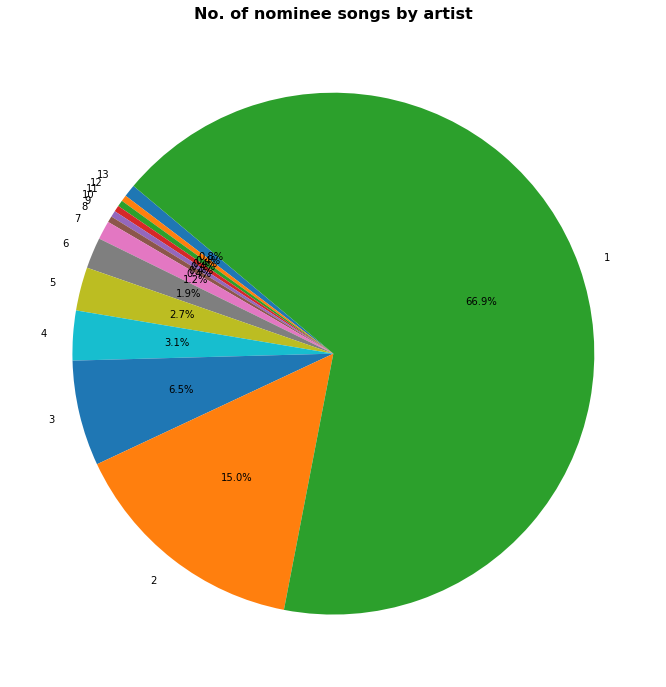

In [6]:
artist_value_counts = seventies_df.artist.value_counts()
artist_count = pd.DataFrame(columns = ['key', 'count'], dtype=int)
for orig_value in artist_value_counts:
    if orig_value in pd.Series(artist_count['count'].astype('int')):
        artist_count.loc[artist_count['key'] == orig_value, 'count'] = artist_count.at[orig_value, 'count']+1
    else:
        artist_count.loc[orig_value] = [orig_value, 1]
plt.figure(figsize=(12,12))
plt.pie(artist_count['count'], labels=artist_count['key'],
autopct='%1.1f%%', startangle=140)
plt.title("No. of nominee songs by artist", {'fontsize': 16,
 'fontweight' : 'bold',
 'verticalalignment': 'bottom', 'horizontalalignment': 'center'})
#plt.axis('equal')
plt.show()

It seems like two thirds of the songs were by artists who inserted only one song to the nominee list. On the other hand, there are five artists who entered more than 10 songs to the nominee list. Let's find out who they are:

In [7]:
popular_artists_df = []
for index in seventies_df.artist.value_counts()[seventies_df.artist.value_counts() > 9].index:
    artist = {}
    artist['name'] = index
    artist['nominee_songs'] = seventies_df.artist.value_counts()[index]
    artist['entered_songs'] = seventies_df.loc[seventies_df['new_chart_location'] > 0].artist.value_counts()[index]
    artist['success_rate'] = artist['entered_songs'] / artist['nominee_songs']
    popular_artists_df.append(artist)
popular_artists_df = pd.DataFrame(popular_artists_df)
display(popular_artists_df)

,name,nominee_songs,entered_songs,success_rate
0,Stevie Wonder,13,1,0.076923
1,David Bowie,13,5,0.384615
2,Elton John,12,6,0.500000
3,ABBA,11,8,0.727273
4,Queen,10,7,0.700000


In [8]:
grouped_by_artist = seventies_df.groupby('artist')
artists_df = []
for index in seventies_df.artist.value_counts().index:
    artist = {}
    artist['name'] = index
    artist['candidate_songs'] = seventies_df.artist.value_counts()[index]
    artist_group = grouped_by_artist.get_group(index)
    artist['num_of_versions'] = artist_group['version_exists'].sum() 
    artist['first_letter'] = artist_group['artist_first_letter'].values[0]
    artist['popularity'] = artist_group['artist_popularity'].values[0]
    artist['avg_song_pop'] = artist_group['song_popularity'].mean()
    artist['max_song_pop'] = artist_group['song_popularity'].max()
    artist['min_song_pop'] = artist_group['song_popularity'].min()
    artist['genres'] = {}
    for song in artist_group['genres']:
        for song_genre in song.split(","):
            if len(re.findall(r"'([^']*)'", song_genre))>0:
                if re.findall(r"'([^']*)'", song_genre)[0] not in artist['genres'].keys():
                    artist['genres'][re.findall(r"'([^']*)'", song_genre)[0]] = 1
                else:
                    artist['genres'][re.findall(r"'([^']*)'", song_genre)[0]] += 1
    artist['sum_views'] = artist_group['views'].sum()
    artist['avg_views'] = artist_group['views'].mean()
    artist['avg_old_chart'] = artist_group.where(artist_group.old_chart_position > 0).old_chart_position.mean()
    artist['count_old_chart'] = artist_group.where(artist_group.old_chart_position > 0).old_chart_position.count()
    artist['avg_new_chart'] = artist_group.where(artist_group.new_chart_location > 0).new_chart_location.mean()
    artist['count_new_chart'] = artist_group.where(artist_group.new_chart_location > 0).new_chart_location.count()
    artists_df.append(artist)
artists_df = pd.DataFrame(artists_df)
print(artists_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260 entries, 0 to 259
Data columns (total 15 columns):
name               260 non-null object
candidate_songs    260 non-null int64
num_of_versions    260 non-null int64
first_letter       260 non-null object
popularity         260 non-null int64
avg_song_pop       260 non-null float64
max_song_pop       260 non-null int64
min_song_pop       260 non-null int64
genres             260 non-null object
sum_views          260 non-null int64
avg_views          260 non-null float64
avg_old_chart      49 non-null float64
count_old_chart    260 non-null int64
avg_new_chart      56 non-null float64
count_new_chart    260 non-null int64
dtypes: float64(4), int64(8), object(3)
memory usage: 27.5+ KB
None


Text(0.5, 0.98, 'Artist popularity vs No of candidate songs')

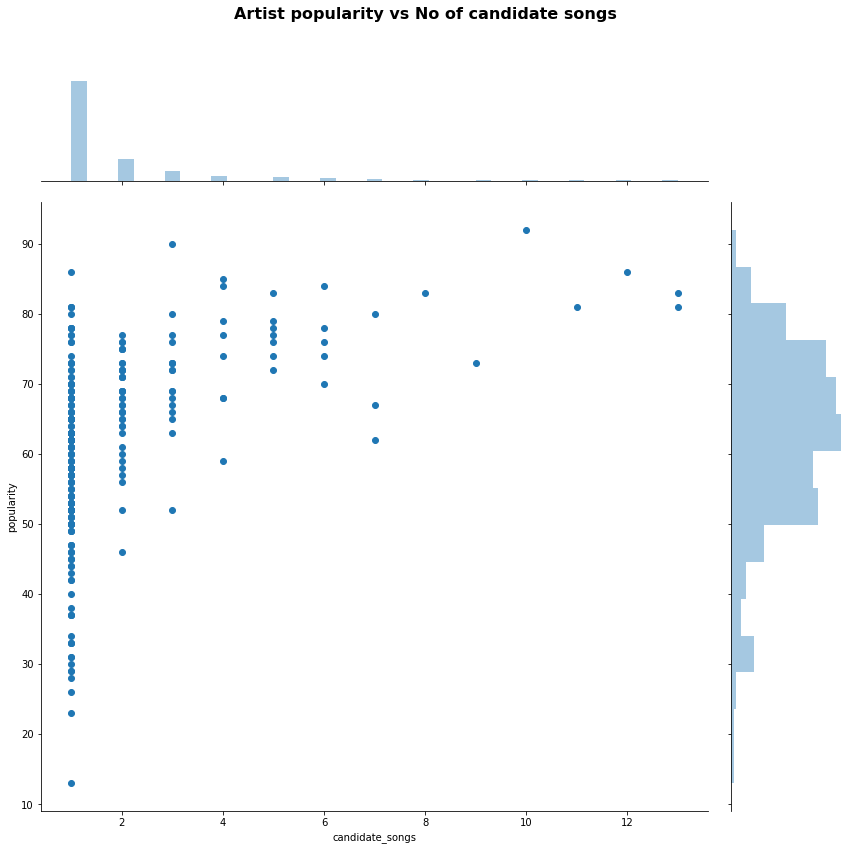

In [9]:
sns.jointplot(x="candidate_songs", y="popularity", data=artists_df, height=12)
plt.subplots_adjust(top=0.9)
plt.suptitle('Artist popularity vs No of candidate songs', fontsize = 16, fontweight = 'bold')


Text(0.5, 0.98, 'Average song popularity vs No of candidate songs')

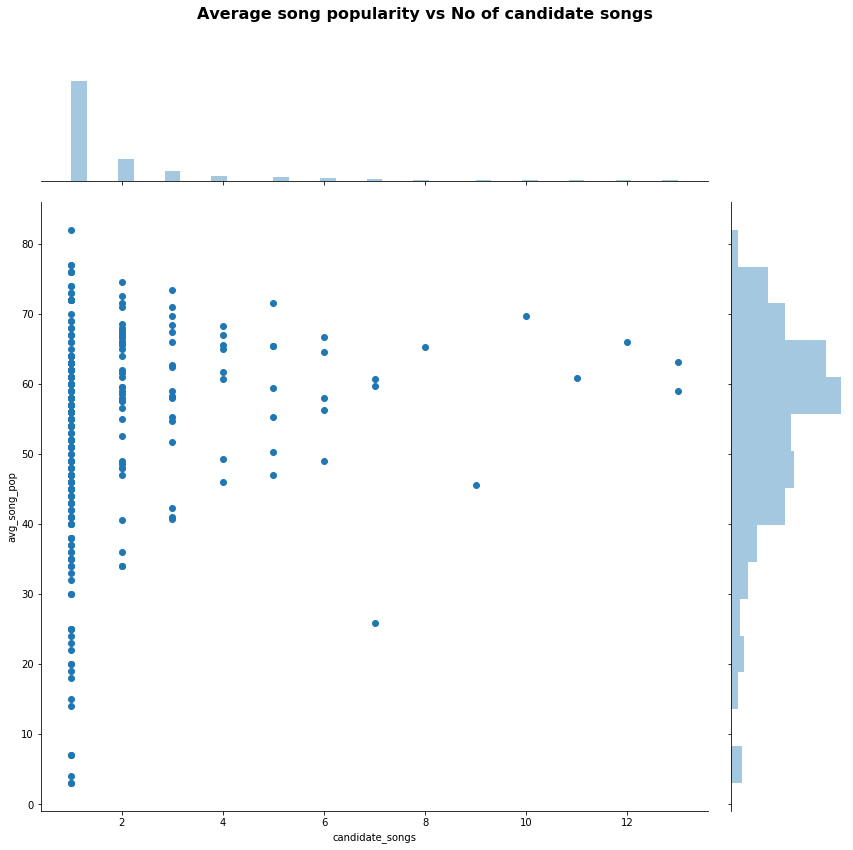

In [10]:
sns.jointplot(x="candidate_songs", y="avg_song_pop", data=artists_df, height=12)
plt.subplots_adjust(top=0.9)
plt.suptitle('Average song popularity vs No of candidate songs', fontsize = 16, fontweight = 'bold')

Text(0.5, 0.98, 'Popularity of the artists most popular song vs No of candidate songs')

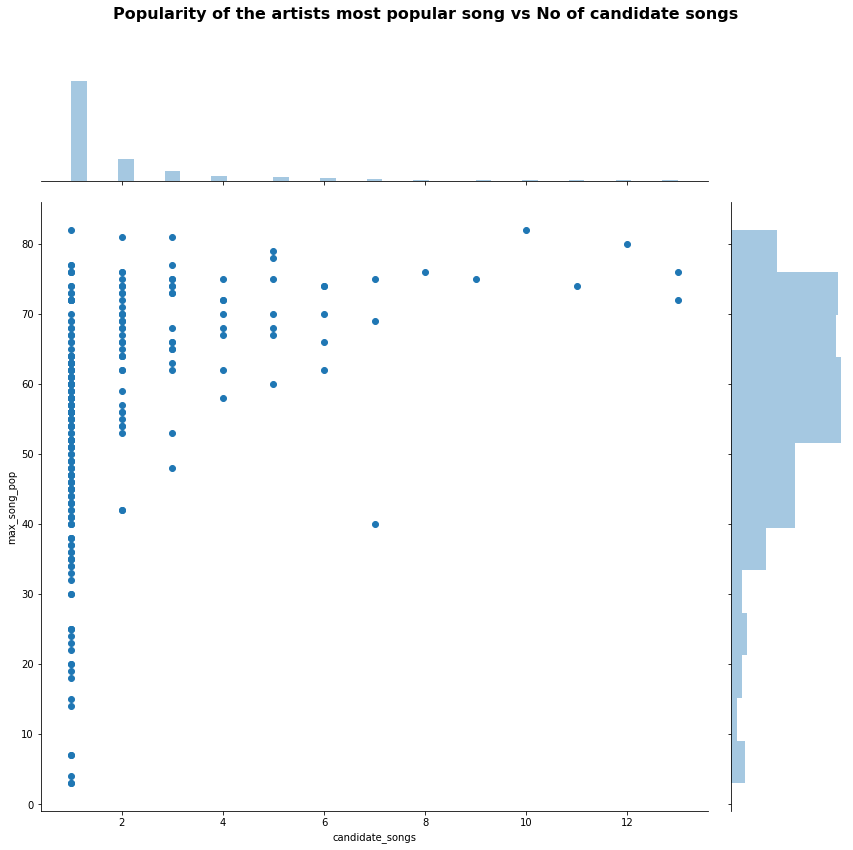

In [11]:
sns.jointplot(x="candidate_songs", y="max_song_pop", data=artists_df, height=12)
plt.subplots_adjust(top=0.9)
plt.suptitle('Popularity of the artists most popular song vs No of candidate songs', fontsize = 16, fontweight = 'bold')

So far I didn't find any interesting connections. I have had a theory that the least popular songs in the nomination list will come from popular artists, meaning that it would be easier for a song to enter the nomination list if it was created by a popular artist. I have decided to look at the artists with songs that has a popularity rate of under 30. How many songs have these artists entered to the nomination list?

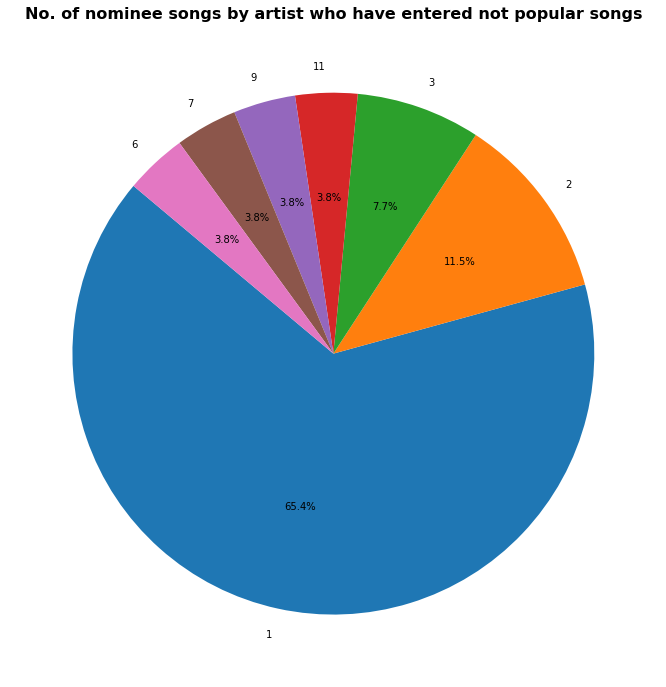

In [12]:
not_popular_songs = artists_df.loc[artists_df['min_song_pop'] < 30]
nps_value_counts = not_popular_songs.candidate_songs.value_counts()
plt.figure(figsize=(12,12))
plt.pie(nps_value_counts, labels=nps_value_counts.index,
autopct='%1.1f%%', startangle=140)
plt.title("No. of nominee songs by artist who have entered not popular songs", {'fontsize': 16,
 'fontweight' : 'bold',
 'verticalalignment': 'bottom', 'horizontalalignment': 'center'})
plt.show()

That looks pretty similar to the overall distribution, so I would say that there is no clear connection.

Text(0.5, 0.98, 'Wikipedia views vs No of candidate songs')

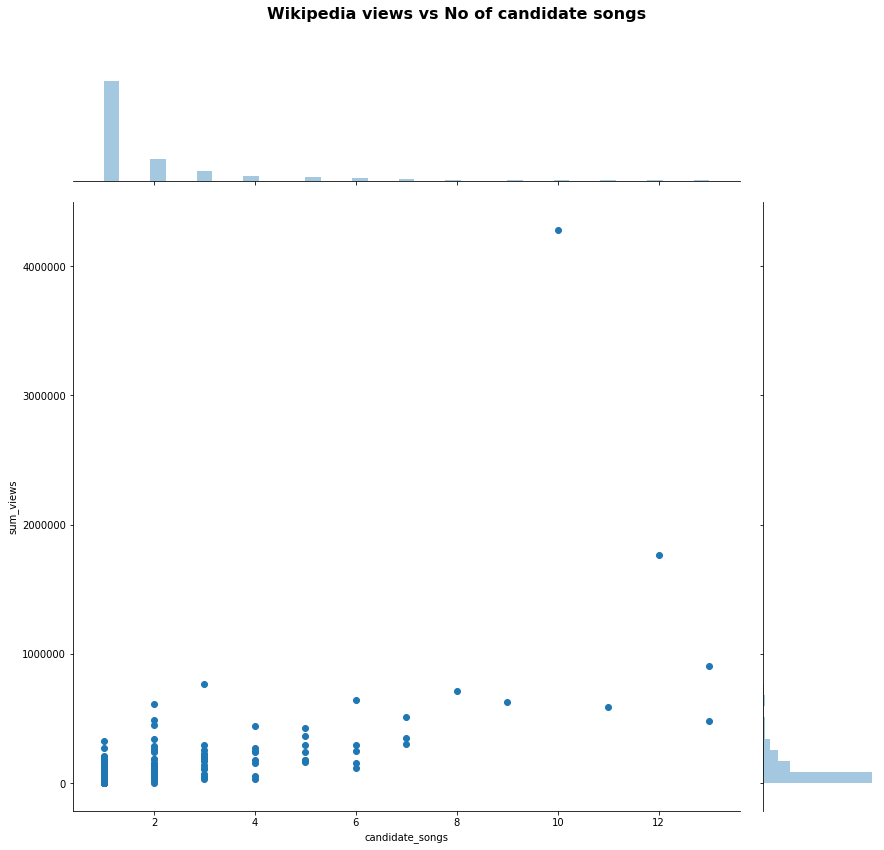

In [13]:
sns.jointplot(x="candidate_songs", y="sum_views", data=artists_df, height=12)
plt.subplots_adjust(top=0.9)
plt.suptitle('Wikipedia views vs No of candidate songs', fontsize = 16, fontweight = 'bold')

Looking at the least popular songs and the amount of nominee songs, at looked quite similar to the general population - therefore I concluded that there is no distinct connection to be seen. I moved on to find a connection between the sum of views of song's wikipedia pages, and the number of nominee songs. I found two outliers with over 1000000 Wikipedia views in 2019. Let's find out who they are.

In [14]:
display(artists_df.loc[artists_df['sum_views'] > 1000000])

,name,candidate_songs,num_of_versions,first_letter,popularity,avg_song_pop,max_song_pop,min_song_pop,genres,sum_views,avg_views,avg_old_chart,count_old_chart,avg_new_chart,count_new_chart
2,Elton John,12,3,E,86,65.916667,80,44,"{'Pop music': 2, 'Soft rock': 5, 'Glam rock': ...",1768095,147341.25,12.4,5,60.000000,6
4,Queen,10,9,Q,92,69.700000,82,46,"{'Art pop': 1, 'Glam rock': 2, 'Power pop': 2,...",4282865,428286.50,13.5,2,18.428571,7


The results are not surprising. Those artists have one of the highest amount of nominee songs. Moreover, both of these artists have a successfull Hollywood movies based upon, which boosted their Wikipedia popularity. Looking at the table itself reveals that just 'Bohemian Rhapsody' had over 1M wikipedia views in the first 10 months of 2019.

Text(0.5, 0.98, 'No of songs that had a version vs No of songs in chart')

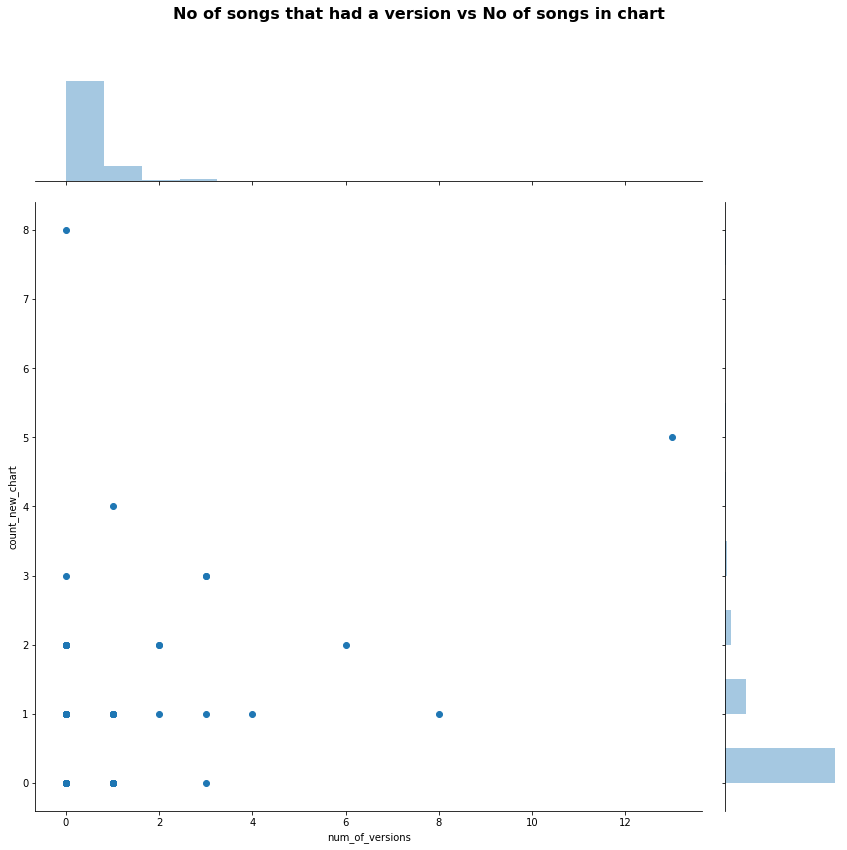

In [15]:
sns.jointplot(x="num_of_versions", y="count_new_chart", data=artists_df.loc[artists_df['sum_views'] < 1000000], height=12)
plt.subplots_adjust(top=0.9)
plt.suptitle('No of songs that had a version vs No of songs in chart', fontsize = 16, fontweight = 'bold')

In [16]:
display(artists_df.loc[artists_df['num_of_versions'] > 10])
display(artists_df.loc[artists_df['num_of_versions'] == 0].loc[artists_df['count_new_chart'] == 8])

,name,candidate_songs,num_of_versions,first_letter,popularity,avg_song_pop,max_song_pop,min_song_pop,genres,sum_views,avg_views,avg_old_chart,count_old_chart,avg_new_chart,count_new_chart
1,David Bowie,13,13,D,83,58.923077,72,40,"{'Art rock': 5, 'Art pop': 1, 'Glam rock': 7, ...",909876,69990.461538,NaN,0,59.4,5


,name,candidate_songs,num_of_versions,first_letter,popularity,avg_song_pop,max_song_pop,min_song_pop,genres,sum_views,avg_views,avg_old_chart,count_old_chart,avg_new_chart,count_new_chart
3,ABBA,11,0,A,81,60.818182,74,29,"{'Europop': 7, 'Disco': 4, 'Pop music': 2, 'Ba...",589974,53634.0,8.0,1,32.875,8


Looking at the number of versions compared to the number of songs entered the chart, there are two outliers. One is an artist who entered 8 songs to the chart without having even one version - ABBA, and the other is an artist who had numerous versions - David Bowie.

Now I have tried look for more interesting connections between features of this table. Let's have a look at the number of songs entered to the old chart as a function of the number of candidate songs.

Text(0.5, 0.98, 'No of candidate songs vs No of songs in old chart')

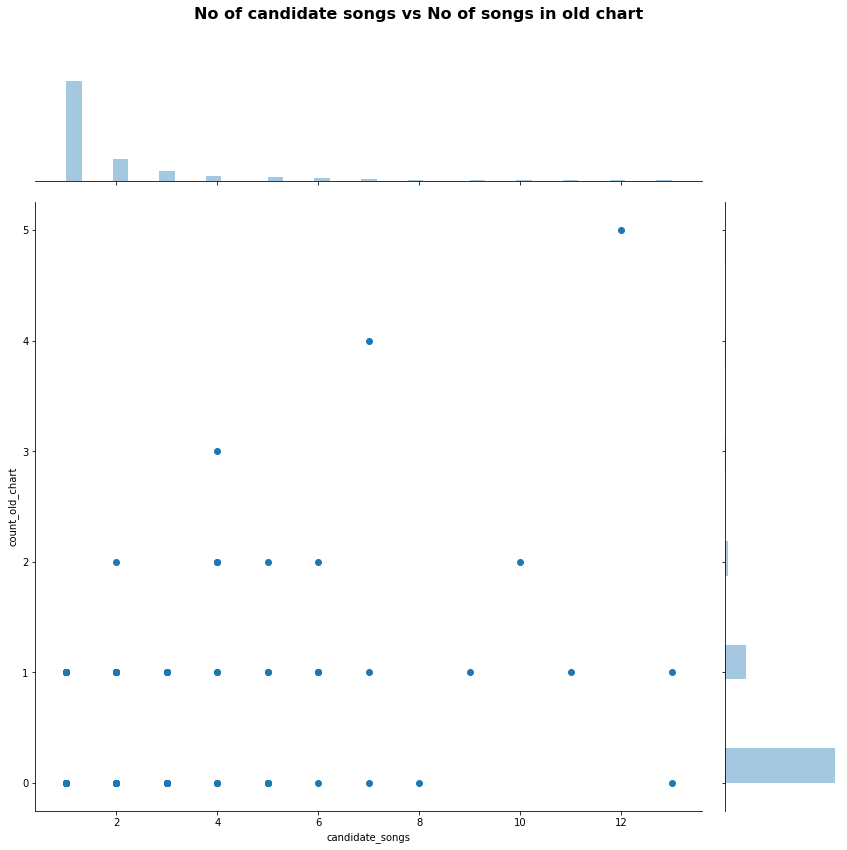

In [17]:
sns.jointplot(x="candidate_songs", y="count_old_chart", data=artists_df, height=12)
plt.subplots_adjust(top=0.9)
plt.suptitle('No of candidate songs vs No of songs in old chart', fontsize = 16, fontweight = 'bold')

In [361]:
display(artists_df.loc[artists_df['count_old_chart'] > 4])

,name,candidate_songs,num_of_versions,first_letter,popularity,avg_song_pop,max_song_pop,min_song_pop,genres,sum_views,avg_views,avg_old_chart,count_old_chart,avg_new_chart,count_new_chart
2,Elton John,12,3,E,86,65.916667,80,44,"{'Pop music': 2, 'Soft rock': 5, 'Glam rock': ...",1768095,147341.25,12.4,5,60.0,6


Only one artist have entered more than 4 songs to the old charts. This is Elton John which had entered 5 songs to the old chart. Interestingly, he managed to insert even more songs to the new chart - 6 songs.

## Artist First Letter

In [23]:
first_letters = artists_df.groupby('first_letter')
fl_df = []
for group in first_letters:
    first_letter = {}
    first_letter['name'] = group[0]
    first_letter['count_artists'] = group[1]['name'].count()
    first_letter['sum_candidate_songs'] = group[1]['candidate_songs'].sum()
    first_letter['sum_popularity'] = group[1]['popularity'].sum()
    first_letter['sum_views'] = group[1]['sum_views'].sum()
    first_letter['count_old_chart'] = group[1]['count_old_chart'].sum()
    first_letter['avg_new_chart'] = group[1]['avg_new_chart'].mean()
    first_letter['count_new_chart'] = group[1]['count_new_chart'].sum()
    fl_df.append(first_letter)
fl_df = pd.DataFrame(fl_df)
print(fl_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26 entries, 0 to 25
Data columns (total 8 columns):
name                   26 non-null object
count_artists          26 non-null int64
sum_candidate_songs    26 non-null int64
sum_popularity         26 non-null int64
sum_views              26 non-null int64
count_old_chart        26 non-null int64
avg_new_chart          19 non-null float64
count_new_chart        26 non-null int64
dtypes: float64(1), int64(6), object(1)
memory usage: 1.6+ KB
None


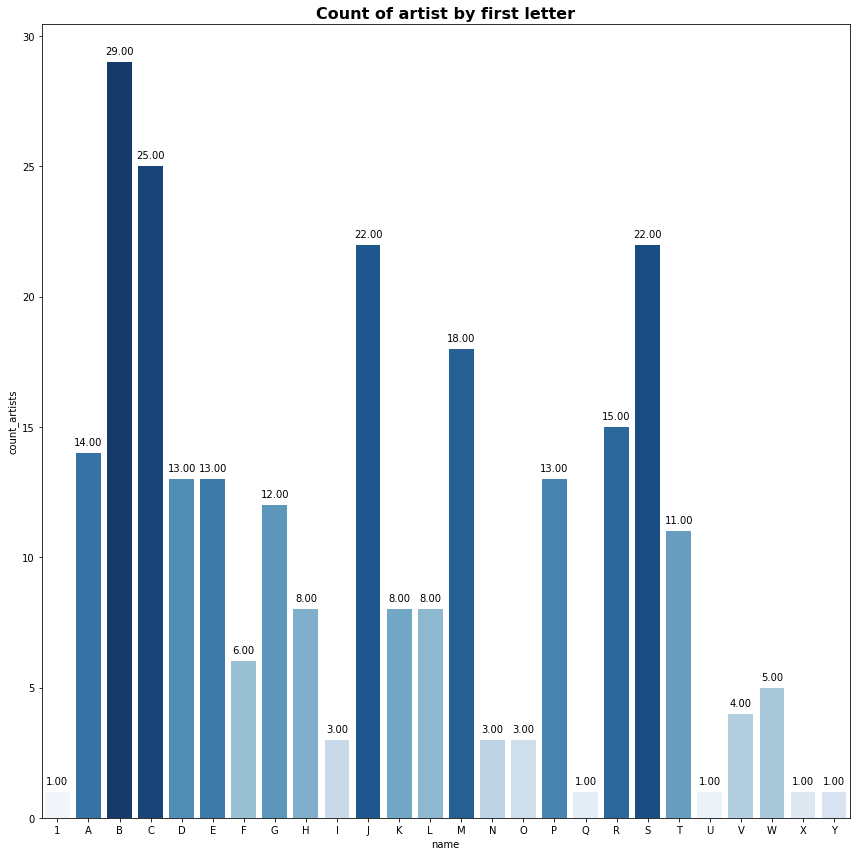

In [364]:

plt.figure(figsize=(12,12))
pal = sns.color_palette("Blues_r", len(fl_df.name))
rank = fl_df.count_artists.argsort().argsort()
ax = sns.barplot(x=fl_df.name, y=fl_df.count_artists, order = fl_df.name, palette = np.array(pal[::-1])[rank])
ax.set_title("Count of artist by first letter", {'fontsize': 16,'fontweight' : 'bold'})
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 0.3,
            '{:1.2f}'.format(p.get_height()),
            ha="center")
plt.tight_layout()
plt.show()

Now I can tackle the main theory regarding those charts. Many people have suggested that the way the voting website was designed had a great influence on the voting pattern. The nominee songs were ordered by the first letter of the artist's name, meaning that songs made by artists whose name is starting with 'A' appeared before songs from artists who are starting with 'B' etc. People argued that songs who appeared first on the nomination lists had a higher chance of getting a vote than the rest of the songs.

In [2]:
plt.figure(figsize=(14,14))
pal = sns.color_palette("Blues_r", len(fl_df.name))
rank = fl_df.sum_candidate_songs.argsort().argsort()
ax = sns.barplot(x=fl_df.name, y=fl_df.sum_candidate_songs, palette = np.array(pal[::-1])[rank])
ax.set_title("Count of songs by artist first letter", {'fontsize': 16,'fontweight' : 'bold'})
ax.set(xlabel="First Letter", ylabel='Candidate Songs')
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 0.3,
            '{:1.2f}'.format(p.get_height()),
            ha="center")
plt.tight_layout()
plt.show()

NameError: name 'plt' is not defined

There is a bigger amount of nominee songs from artists who starts with 'A' than any other letter. Other than that, there is no distinct pattern. Now, let's take a look at the popularity.

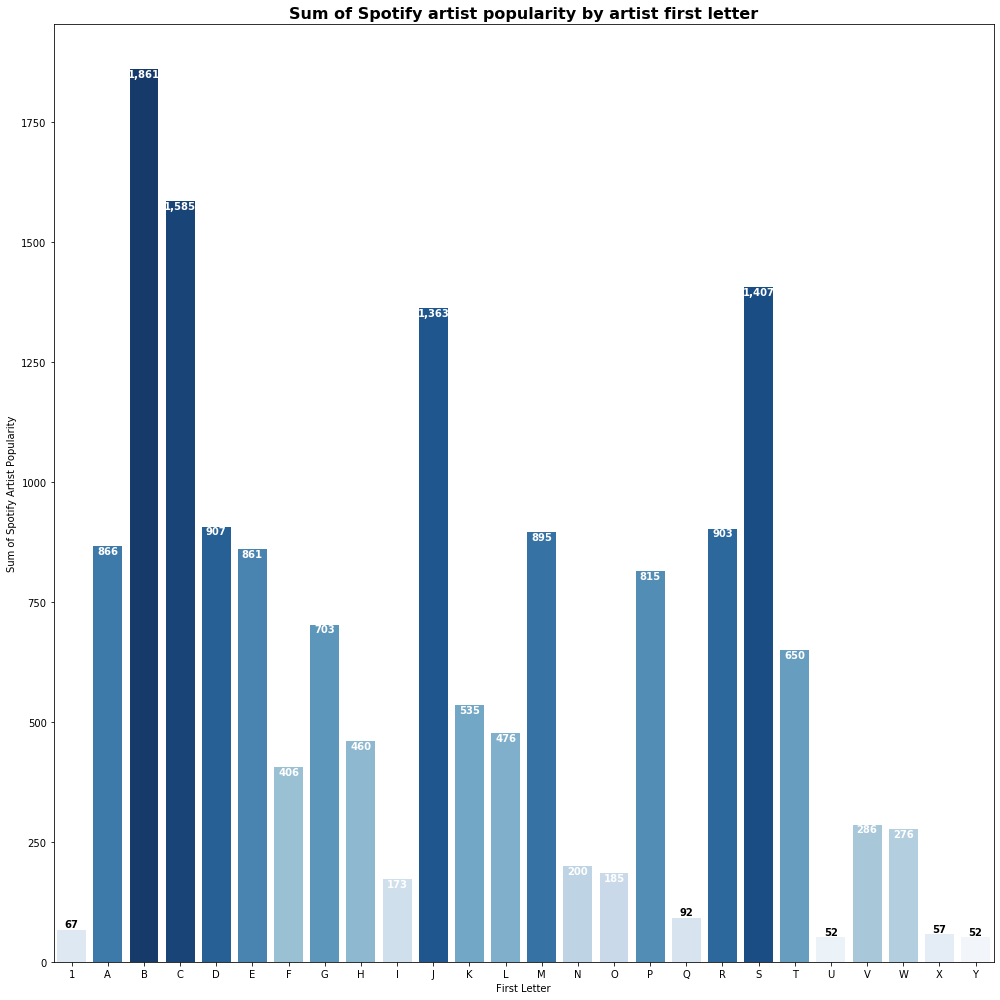

In [366]:
plt.figure(figsize=(14,14))
pal = sns.color_palette("Blues_r", len(fl_df.name))
rank = fl_df.sum_popularity.argsort().argsort()
ax = sns.barplot(x=fl_df.name, y=fl_df.sum_popularity, palette = np.array(pal[::-1])[rank])
ax.set_title("Sum of Spotify artist popularity by artist first letter", {'fontsize': 16,'fontweight' : 'bold'})
ax.set(xlabel="First Letter", ylabel='Sum of Spotify Artist Popularity')
for i, v in enumerate(fl_df.sum_popularity):
    if v < 100:
        ax.text(i ,v, "{:,}".format(v), va ='bottom', ha= "center", weight="bold")
    else:    
        ax.text(i ,v, "{:,}".format(v), va ='top', ha= "center", color="white", weight="bold")
plt.tight_layout()
plt.show()

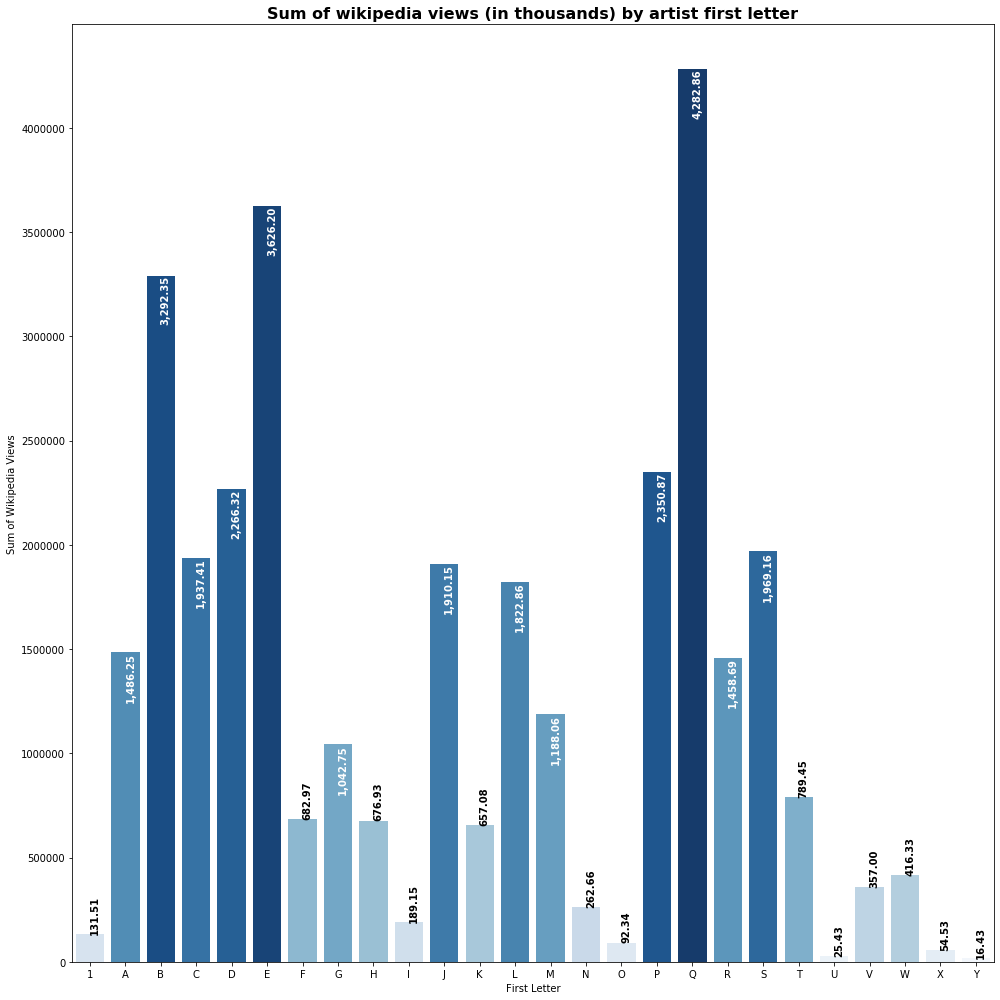

In [367]:
plt.figure(figsize=(14,14))
pal = sns.color_palette("Blues_r", len(fl_df.name))
rank = fl_df.sum_views.argsort().argsort()
ax = sns.barplot(x=fl_df.name, y=fl_df.sum_views, palette = np.array(pal[::-1])[rank])
ax.set_title("Sum of wikipedia views (in thousands) by artist first letter", {'fontsize': 16,'fontweight' : 'bold'})
ax.set(xlabel="First Letter", ylabel='Sum of Wikipedia Views')
#for item in ax.get_xticklabels(): item.set_rotation(90)
for i, v in enumerate(fl_df.sum_views):
    if v < 1000000:
        ax.text(i ,v, "{:,.2f}".format(v/1000), va ='bottom', rotation=90, weight='bold')
    else:
        ax.text(i ,v, "{:,.2f}".format(v/1000), va ='top', rotation=90, color = 'white', weight='bold')
plt.tight_layout()
plt.show()

We can see that the overall popularity of artists coming from 'A' or 'B' exceeds those who come from other letters. Looking at the Wikipedia entries, once again we come across the special phenomena of Queen.

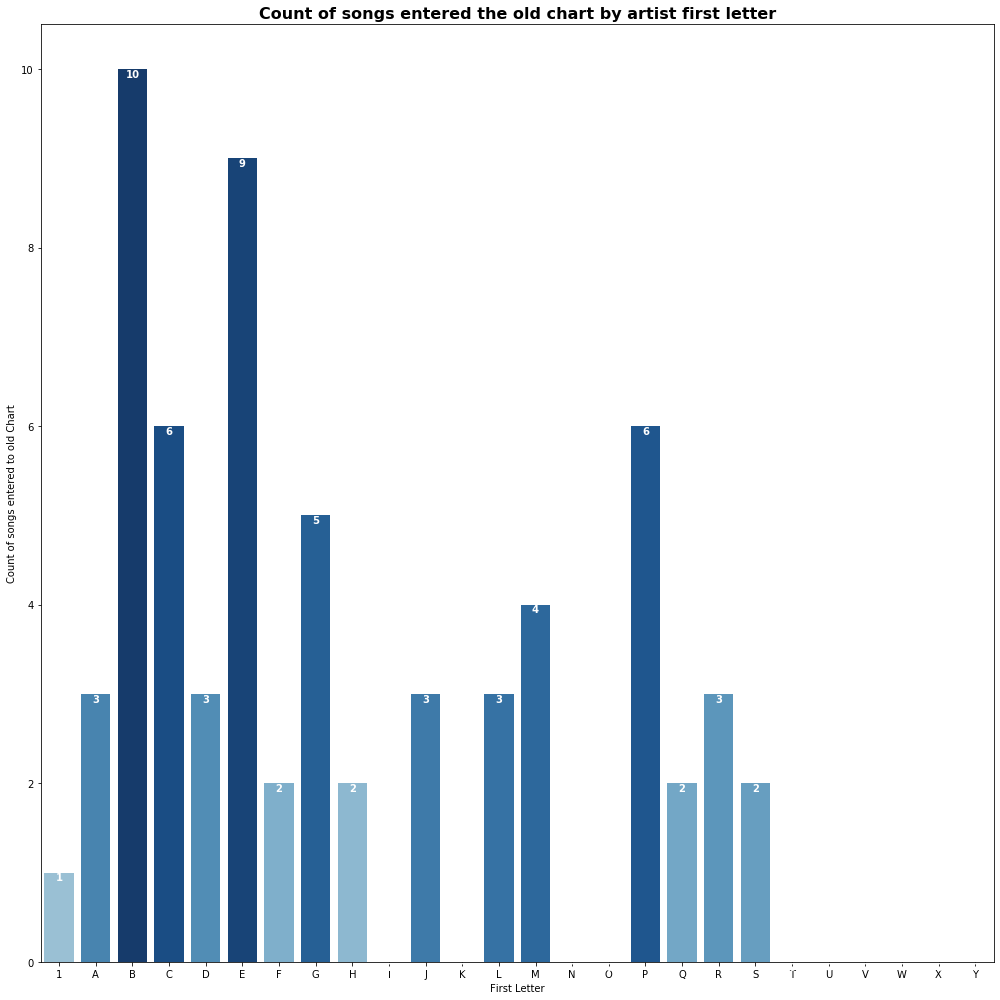

In [368]:
plt.figure(figsize=(14,14))
pal = sns.color_palette("Blues_r", len(fl_df.name))
rank = fl_df.count_old_chart.argsort().argsort()
ax = sns.barplot(x=fl_df.name, y=fl_df.count_old_chart, palette = np.array(pal[::-1])[rank])
ax.set(xlabel="First Letter", ylabel='Count of songs entered to old Chart')
ax.set_title("Count of songs entered the old chart by artist first letter", {'fontsize': 16,'fontweight' : 'bold'})
#for item in ax.get_xticklabels(): item.set_rotation(90)
for i, v in enumerate(fl_df.count_old_chart):
    ax.text(i ,v, "{:,}".format(v), va ='top', ha= "center", color="white", weight="bold")
plt.tight_layout()
plt.show()

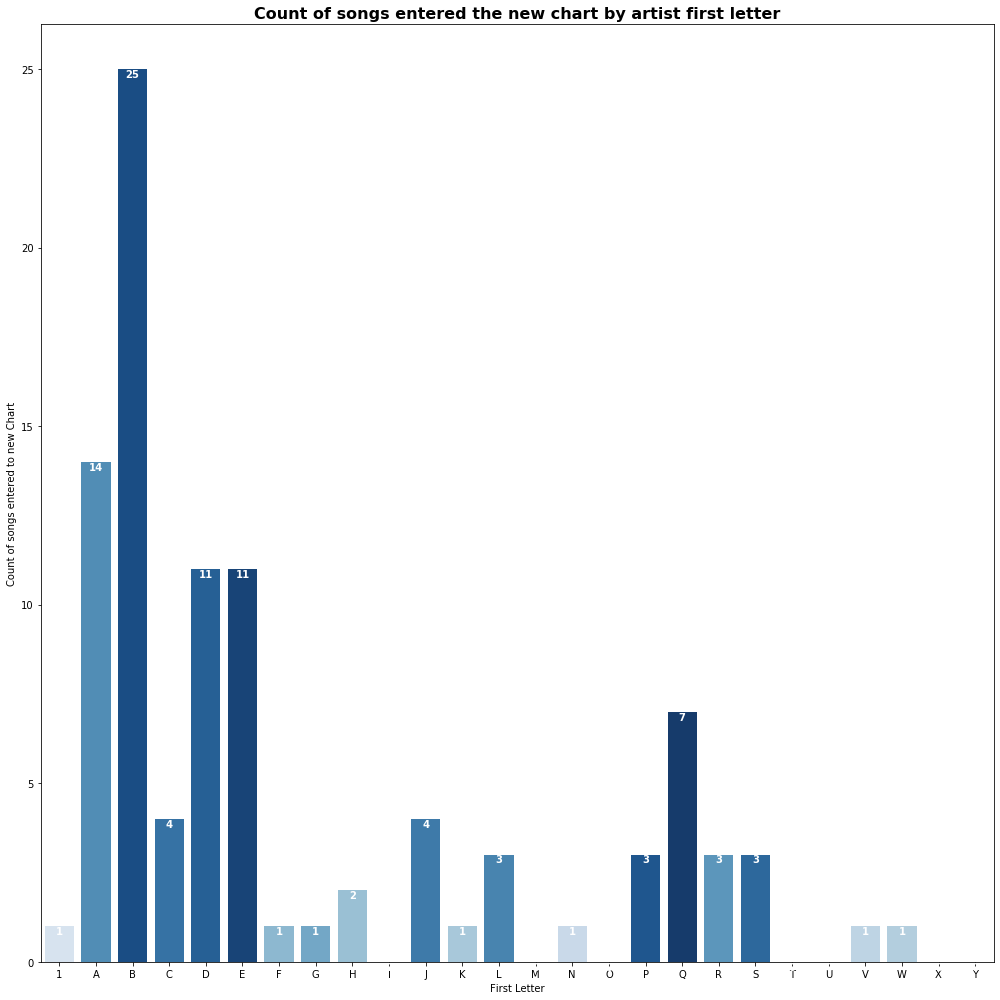

In [369]:
plt.figure(figsize=(14,14))
pal = sns.color_palette("Blues_r", len(fl_df.name))
rank = fl_df.sum_views.argsort().argsort()
ax = sns.barplot(x=fl_df.name, y=fl_df.count_new_chart, palette = np.array(pal[::-1])[rank])
ax.set_title("Count of songs entered the new chart by artist first letter", {'fontsize': 16,'fontweight' : 'bold'})
ax.set(xlabel="First Letter", ylabel='Count of songs entered to new Chart')
#for item in ax.get_xticklabels(): item.set_rotation(90)
for i, v in enumerate(fl_df.count_new_chart):
    ax.text(i ,v, "{:,}".format(v), va ='top', ha= "center", color="white", weight="bold")
plt.tight_layout()
plt.show()

We can see interesting differences between the two charts. Looking at absolute numbers, there seems to be a clear preference to songs from artists in the first letters, which is not as clear looking at the old charts. In fact, 40 songs (out of 100!) entered the chart came from artists starting with A, B or C. Another interesting phenomena is once again Queen. It turns out they are way more popular now than they were during the 70's. They only inserted 2 songs to the original yearly charts of the 70's - and now they have 7 songs in the chart.

Now I want to find out how sensible it is that 40 songs came from the first letters - maybe (as we already seen) there are just a lot of nominated songs coming from these letters?

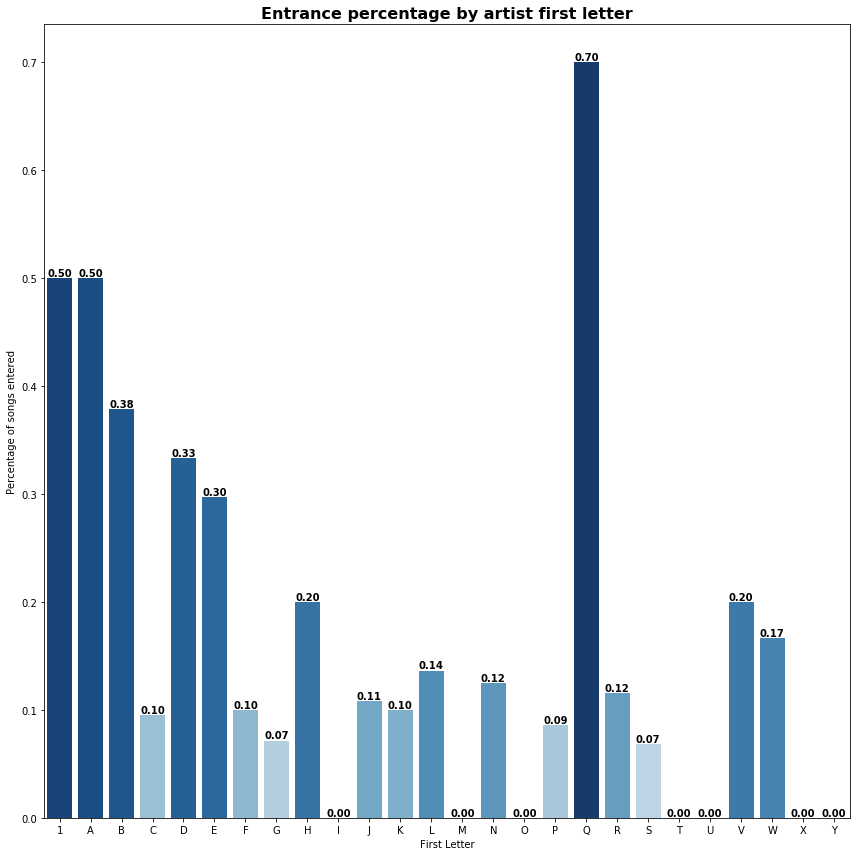

In [370]:
fl_df['entrance_percentage'] = fl_df['count_new_chart'].div(fl_df['sum_candidate_songs']).to_frame('col')
plt.figure(figsize=(12,12))
pal = sns.color_palette("Blues_r", len(fl_df.name))
rank = fl_df.entrance_percentage.argsort().argsort()
ax = sns.barplot(x=fl_df.name, y=fl_df.entrance_percentage, palette = np.array(pal[::-1])[rank])
ax.set_title("Entrance percentage by artist first letter", {'fontsize': 16,'fontweight' : 'bold'})
ax.set(xlabel="First Letter", ylabel='Percentage of songs entered')
#for item in ax.get_xticklabels(): item.set_rotation(90)
for i, v in enumerate(fl_df.entrance_percentage):
    ax.text(i ,v, "{:,.2f}".format(v), va ='bottom', ha= "center", weight="bold")
plt.tight_layout()
plt.show()

The entrance percentage of the first letters is higher than the rest of the letters, except for, once again - Queen - which are the only artist populating the letter 'Q'. 

## Year

In [6]:
import operator
grouped_by_year = seventies_df.groupby('year')
year_df = []
for group in grouped_by_year:
    year = {}
    year['name'] = group[0]
    year['count_candidates'] = group[1]['name'].count()
    year['count_entrances'] = group[1].loc[group[1]['new_chart_location'] > 0]['name'].count()
    year['entrance_percentage'] = year['count_entrances']/year['count_candidates']
    year['avg_song_pop'] = group[1]['song_popularity'].mean()
    year['avg_views'] = group[1]['views'].mean()
    year['avg_chart_location'] = group[1].loc[group[1]['new_chart_location'] > 0]['new_chart_location'].mean()
    year['avg_valence'] = group[1]['valence'].mean()
    genres = {}
    for song in group[1]['genres']:
        for song_genre in song.split(","):
            if len(re.findall(r"'([^']*)'", song_genre))>0:
                if re.findall(r"'([^']*)'", song_genre)[0] not in genres.keys():
                    genres[re.findall(r"'([^']*)'", song_genre)[0]] = 1
                else:
                    genres[re.findall(r"'([^']*)'", song_genre)[0]] += 1
    year['popular_genre'] = max(genres.items(), key=operator.itemgetter(1))[0]
    year_df.append(year)
year_df= pd.DataFrame(year_df)
display(year_df)

,name,count_candidates,count_entrances,entrance_percentage,avg_song_pop,avg_views,avg_chart_location,avg_valence,popular_genre
0,1970,57,9,0.157895,56.631579,55190.157895,48.666667,0.531000,Folk rock
1,1971,52,9,0.173077,59.846154,59154.865385,52.777778,0.550077,Folk rock
2,1972,46,11,0.239130,57.652174,73920.565217,61.454545,0.550483,Glam rock
3,1973,38,8,0.210526,55.842105,74101.342105,43.750000,0.601711,Hard rock
4,1974,41,8,0.195122,51.170732,70102.000000,61.625000,0.560910,Glam rock
5,1975,41,9,0.219512,52.000000,73772.609756,43.888889,0.546610,Soul music
6,1976,45,9,0.200000,54.622222,91064.622222,54.000000,0.614289,Disco
7,1977,61,12,0.196721,58.639344,65200.721311,43.916667,0.659344,Disco
8,1978,44,10,0.227273,54.795455,56175.113636,46.100000,0.720045,Disco
9,1979,72,12,0.166667,56.763889,56971.263889,44.000000,0.707056,Disco


There are some interesting conclusions from this table. First of all, let's have a look at the entrance percentage - how many songs of the nomination list actually made it into the chart. 1972 immidiately sticks out - out of 46 nominee songs - 11 got in, in the highest percentage of 24%. Looking at popularity or viewing rates shows no distinct superiority to songs released this year compared to other years. Before we'll have a look at the songs in the chart out of 1972, lets look at the average valence. 

Valence is a criteria made by Spotify. Here's a qoute from the official website - "A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry).". Now, looking at the average valence, we can see that as the decade goes - songs are getting happier. It also fits the "most popular genre" description. The decade begins with gloomy folk-rock and ends with Disco.

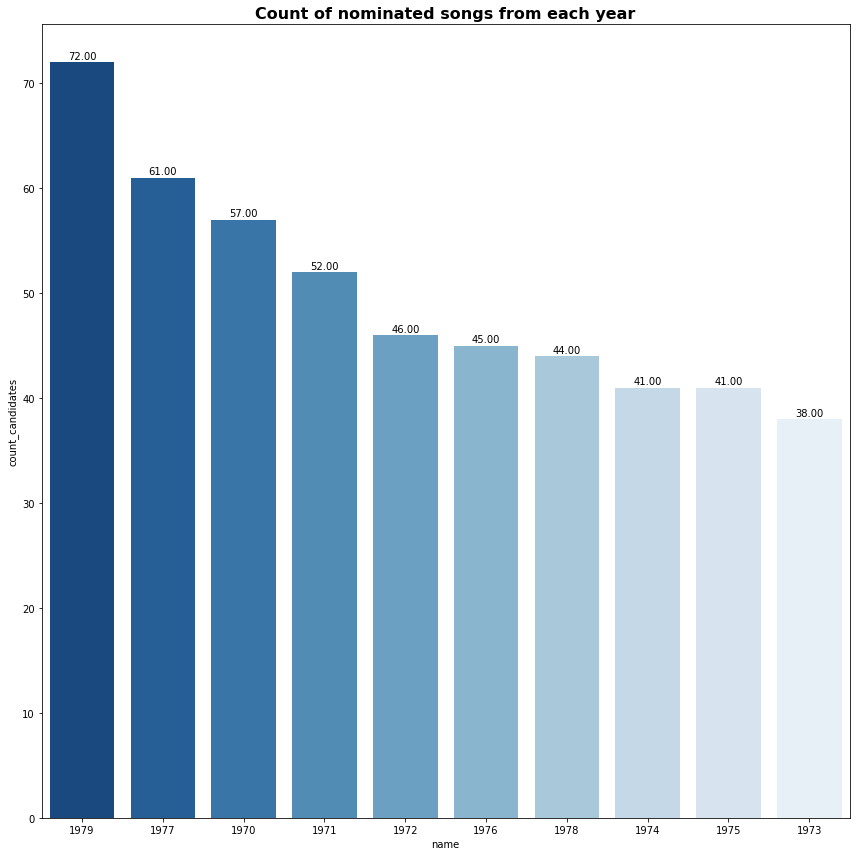

In [7]:
plt.figure(figsize=(12,12))
keys_df = year_df.sort_values('count_candidates', ascending = False)
ax = sns.barplot(x=year_df.name, y=year_df.count_candidates, order=keys_df.name, palette ="Blues_r")
ax.set_title("Count of nominated songs from each year", {'fontsize': 16,'fontweight' : 'bold'})
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 0.3,
            '{:1.2f}'.format(p.get_height()),
            ha="center")
plt.tight_layout()
plt.show()

Not all years are equal - while 1979 sent 72 songs to the nomination list (over 14 percent), 1973 was the least popular year with just 38 nominee songs - just over a half of the nominee songs from 1979.

## Year Source

In [8]:
year_source = seventies_df.groupby('year_source')
source_df = []
for group in year_source:
    source = {}
    source['name'] = group[0]
    source['count_songs'] = group[1]['name'].count()
    source['avg_song_popularity'] = group[1]['song_popularity'].mean()
    source['avg_views'] = group[1]['views'].mean()
    source['count_old_chart'] = group[1]['old_chart_position'].loc[group[1]['old_chart_position'] > 0].count()
    source['count_new_chart'] = group[1]['new_chart_location'].loc[group[1]['new_chart_location'] > 0].count()
    source['entrance_percentage'] = source['count_new_chart']/source['count_songs']
    source['avg_new_chart'] = group[1]['new_chart_location'].loc[group[1]['new_chart_location'] > 0].mean()
    source_df.append(source)
source_df = pd.DataFrame(source_df)
display(source_df)

,name,count_songs,avg_song_popularity,avg_views,count_old_chart,count_new_chart,entrance_percentage,avg_new_chart
0,manual,33,43.454545,42127.696970,2,1,0.030303,47.00000
1,spotify,56,54.678571,60803.339286,5,10,0.178571,47.70000
2,wikipedia,408,57.306373,69094.448529,57,86,0.210784,50.05814


I was interested to find out whether the source of the tagging had any influence at all. I have tagged my songs the way that the software looks first in Wikipdia. If Wikipedia doesn't contain a tagging which fits the requirement (it must be within the century's boundaries), then I look for the tagging in Spotify. Once again, if no proper tagging exists, than I tagged the years manually. It seems that the songs that the software found a proper tagging for in Wikipedia were generally more popular. Only one of the 33 songs that were tagged manually have made it into the chart, while Wikipedia tagging has 21 percent of success.

Now I have decided to compare the songs that entered to the chart to the ones who didn't.

In [18]:
seventies_df["entered_chart"] = seventies_df["new_chart_location"] > 0
entered_chart = seventies_df.groupby('entered_chart')
entered_df = []
for group in entered_chart:
    bol = {}
    bol['name'] = group[0]
    bol['avg_song_popularity'] = group[1]['song_popularity'].mean()
    bol['avg_artist_popularity'] = group[1]['artist_popularity'].mean()
    bol['avg_duration'] = group[1]['duration_ms'].mean()
    bol['avg_key'] = group[1]['key'].mean()
    bol['avg_time_signature'] = group[1]['time_signature'].mean()
    bol['avg_acousticness'] = group[1]['acousticness'].mean()
    bol['avg_danceability'] = group[1]['danceability'].mean()
    bol['avg_energy'] = group[1]['energy'].mean()
    bol['avg_instrumentalness'] = group[1]['instrumentalness'].mean()
    bol['avg_loudness'] = group[1]['loudness'].mean()
    bol['avg_speechiness'] = group[1]['speechiness'].mean()
    bol['avg_valence'] = group[1]['valence'].mean()
    bol['avg_tempo'] = group[1]['tempo'].mean()
    bol['avg_views'] = group[1]['views'].mean()
    bol['avg_year'] = group[1]['year'].mean()
    bol['count_old_position'] = group[1]['old_chart_position'].loc[group[1]['old_chart_position'] > 0].count()
    entered_df.append(bol)
entered_df = pd.DataFrame(entered_df)
display(entered_df)

,name,avg_song_popularity,avg_artist_popularity,avg_duration,avg_key,avg_time_signature,avg_acousticness,avg_danceability,avg_energy,avg_instrumentalness,avg_loudness,avg_speechiness,avg_valence,avg_tempo,avg_views,avg_year,count_old_position
0,False,54.175000,66.822500,248302.187500,5.135000,3.930000,0.311794,0.566908,0.584701,0.055456,-10.332968,0.052118,0.625416,120.267415,48703.397500,1974.665000,45
1,True,63.989691,75.690722,259529.793814,5.453608,3.927835,0.367487,0.530299,0.558268,0.025068,-9.713763,0.053288,0.543847,121.693505,139220.381443,1974.721649,19


In [19]:
entered_songs = seventies_df.loc[seventies_df['entered_chart'] == True]
genres_dict = {}
for song_genre in entered_songs['genres']:
    for genre in song_genre.split(","):
        if len(re.findall(r"'([^']*)'", genre))>0:
            if re.findall(r"'([^']*)'", genre)[0] in genres_dict.keys():
                genres_dict[re.findall(r"'([^']*)'", genre)[0]] = genres_dict[re.findall(r"'([^']*)'", genre)[0]] + 1
            else:
                genres_dict[re.findall(r"'([^']*)'", genre)[0]] = 1
newDict = dict(filter(lambda elem: elem[1] > 5,genres_dict.items()))
order_key = sorted(newDict.items(), key=operator.itemgetter(1), reverse = True)
keys = []
for key in order_key:
    keys.append(key[0])
plt.figure(figsize=(12,12))
ax = sns.barplot(x=list(newDict.keys()), y=np.array(list(newDict.values())).astype(float), order = keys,
                palette = "Blues_r")
ax.set_title("Count of songs entered the chart per genre", {'fontsize': 16,'fontweight' : 'bold'})
ax.set(xlabel="Genre", ylabel='Count')
for item in ax.get_xticklabels(): item.set_rotation(90)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 0.3,
            '{:,}'.format(p.get_height()),
            ha="center")
plt.tight_layout()
plt.show()

NameError: name 'operator' is not defined

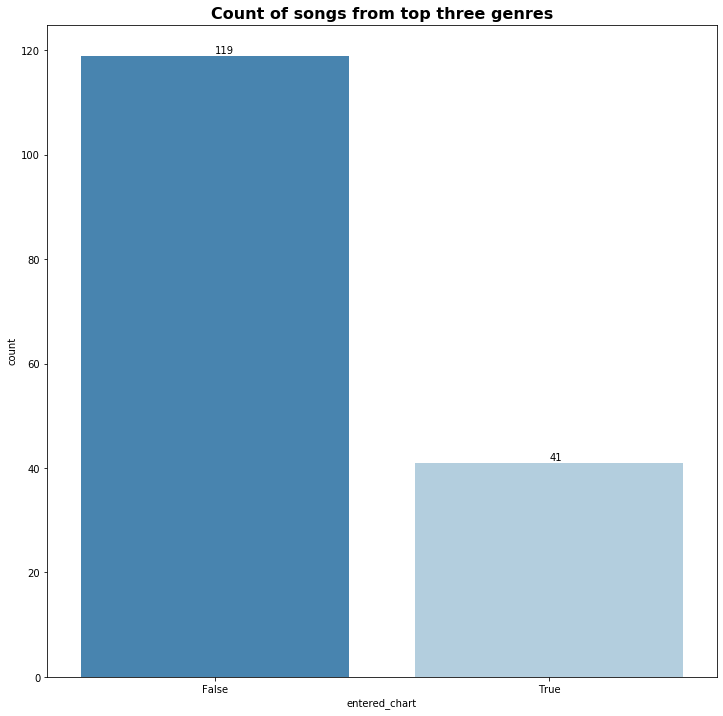

In [20]:
top_genres = pd.DataFrame(columns = seventies_df.columns)
i = 0
for index, row in seventies_df.iterrows():
    for genre in row.genres.split(","):
        if len(re.findall(r"'([^']*)'", genre))>0:
            if re.findall(r"'([^']*)'", genre)[0] in ['Soft rock', 'Disco', 'Folk rock']:
                top_genres.loc[i] = row
                i = i + 1
plt.figure(figsize=(12,12))                
ax = sns.countplot(x=top_genres.entered_chart, palette = "Blues_r")
ax.set_title("Count of songs from top three genres", {'fontsize': 16,'fontweight' : 'bold'})
for i, v in enumerate(top_genres.entered_chart.value_counts()):
    ax.text(i ,v, "{:,}".format(v), va ='bottom')    

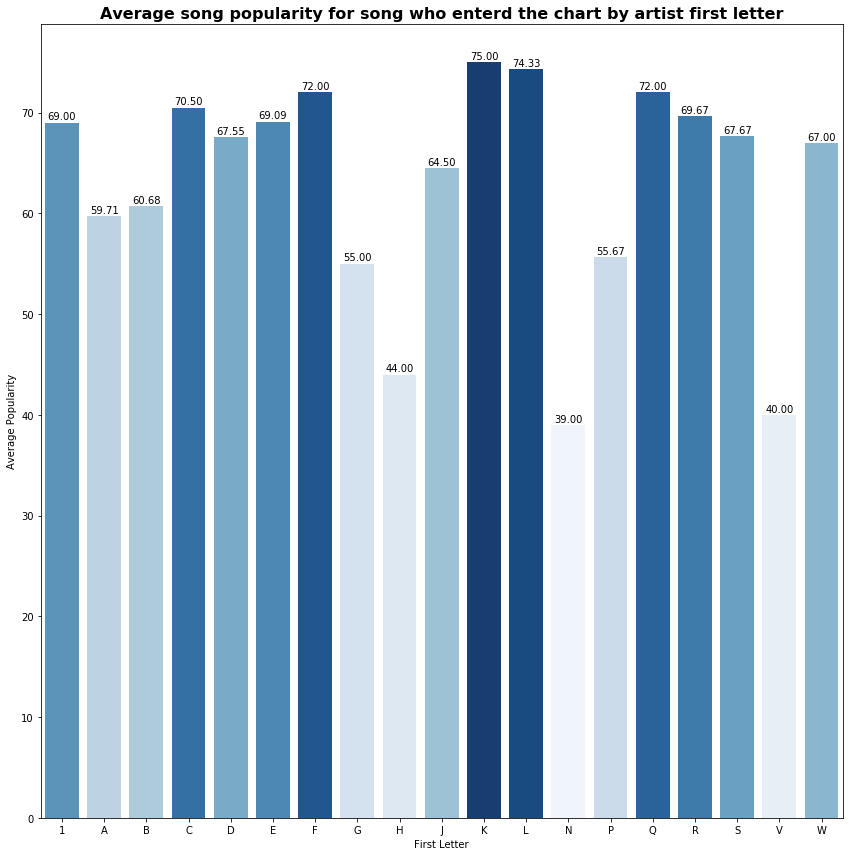

In [27]:
entered_first_letter = entered_songs.groupby('artist_first_letter')
entered_fl_df = []
for group in entered_first_letter:
    entered_fl = {}
    entered_fl['name'] = group[0]
    entered_fl['avg_song_popularity'] = group[1]['song_popularity'].mean()
    entered_fl['avg_views'] = group[1]['views'].mean()
    entered_fl['avg_chart_location'] = group[1]['new_chart_location'].mean()
    entered_fl_df.append(entered_fl)
entered_fl_df = pd.DataFrame(entered_fl_df)
plt.figure(figsize=(12,12))
pal = sns.color_palette("Blues_r", len(entered_fl_df.name))
rank = entered_fl_df.avg_song_popularity.argsort().argsort()
ax = sns.barplot(x=entered_fl_df.name, y=entered_fl_df.avg_song_popularity, palette = np.array(pal[::-1])[rank])
ax.set(xlabel="First Letter", ylabel='Average Popularity')
ax.set_title("Average song popularity for song who enterd the chart by artist first letter", {'fontsize': 16,'fontweight' : 'bold'})
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 0.3,
            '{:,.2f}'.format(p.get_height()),
            ha="center")
plt.tight_layout()
plt.show()

I was looking for a clear influence of the artist's first letter on the song popularity among the songs who made it into the chart. My assumption was that it's easier for a song in the first letters to get into the chart than the rest of the songs. Therefore, I would expect the average popularity of those letters to be smaller than the rest. I see no such interaction here, but I would like to get a clearer view. I will split the songs into two groups: those coming from artists starting at neither '1', 'A', or 'B', and the rest of them. Then, I would look at the average popularity and average location of these songs.

In [29]:
count_first_songs = 0
popularity_first_rate = 0
location_first_rate = 0
wiki_first_rate = 0
count_last_songs = 0
popularity_last_rate = 0
location_last_rate = 0
wiki_last_rate = 0
for fl in entered_first_letter:
    if fl[0] in ['1', 'A', 'B']:
        count_first_songs = count_first_songs + fl[1]['name'].count()
        popularity_first_rate = popularity_first_rate + fl[1]['song_popularity'].sum()
        wiki_first_rate = wiki_first_rate + fl[1]['views'].sum()
        location_first_rate = location_first_rate + fl[1]['new_chart_location'].sum()
    else:
        count_last_songs = count_last_songs + fl[1]['name'].count()
        popularity_last_rate = popularity_last_rate + fl[1]['song_popularity'].sum()
        wiki_last_rate = wiki_last_rate + fl[1]['views'].sum()
        location_last_rate = location_last_rate + fl[1]['new_chart_location'].sum()
comparing_letters = pd.DataFrame({'Name': ['First Letters', 'Rest of the Letters'], 'Count': [count_first_songs, count_last_songs], 
                                  'Popularity': [popularity_first_rate, popularity_last_rate],
                                  'Views': [wiki_first_rate, wiki_last_rate],
                                 'Avg_Popularity': [popularity_first_rate/count_first_songs, popularity_last_rate/count_last_songs],
                                 'Avg_Views': [wiki_first_rate/count_first_songs, wiki_last_rate/count_last_songs],
                                  'Avg_Location': [location_first_rate/count_first_songs, location_last_rate/count_last_songs]})
display(comparing_letters)

,Name,Count,Popularity,Views,Avg_Popularity,Avg_Views,Avg_Location
0,First Letters,40,2422,2785175,60.550000,69629.375000,46.975000
1,Rest of the Letters,57,3785,10719202,66.403509,188056.175439,51.754386


This is where I believe the influence of the design of the website is best presented. We see that the average popularity of the songs of the first letter is 9.1% lower than the popularity of the other songs. That means that on average, a song coming from an artist with the first letter has a lower popularity rate bar to get into the chart. Not only that, but the average location of the songs coming from the first group is 9.07% lower, which means that not only do these songs made it through the somewhat artificial bar into the chart, but they also got to relatively better positions.

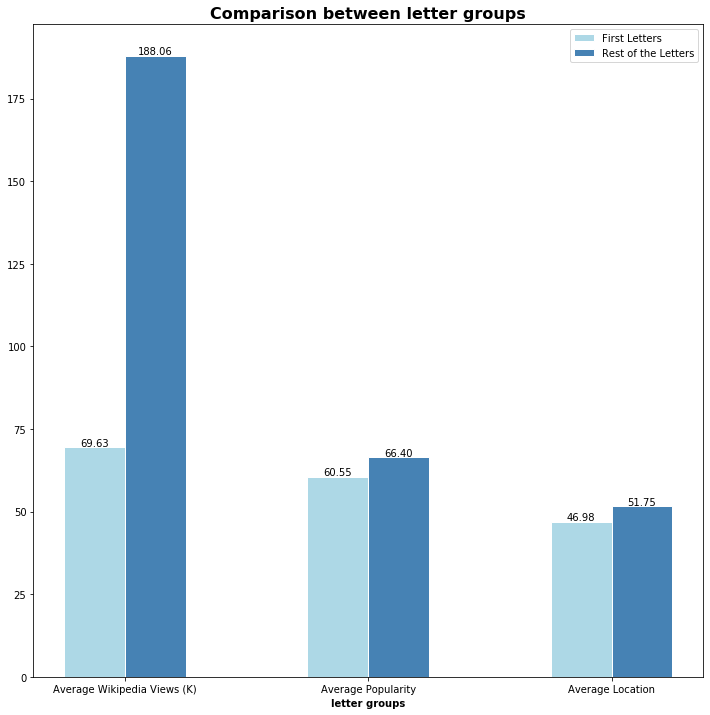

In [34]:
df_for_graph = pd.DataFrame({
    'First Letters': [wiki_first_rate/(count_first_songs*1000), popularity_first_rate/count_first_songs, location_first_rate/count_first_songs],
    'Rest': [wiki_last_rate/(count_last_songs*1000), popularity_last_rate/count_last_songs, location_last_rate/count_last_songs]
})

barWidth = 0.25
 
# set height of bar
bars1 = df_for_graph['First Letters']
bars2 = df_for_graph['Rest']

# Set position of bar on X axis
r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]

fig, ax = plt.subplots(figsize=(12,12))
ax.set_title("Comparison between letter groups", {'fontsize': 16,'fontweight' : 'bold'})

# Make the plot
plt.bar(r1, bars1, color='lightblue', width=barWidth, edgecolor='white', label='First Letters')
plt.bar(r2, bars2, color='steelblue', width=barWidth, edgecolor='white', label='Rest of the Letters')

# Add xticks on the middle of the group bars
plt.xlabel('letter groups', fontweight='bold')
plt.xticks([r + (barWidth / 2) for r in range(len(bars1))], ['Average Wikipedia Views (K)', 'Average Popularity', 'Average Location'])

for p in ax.patches:
    height = p.get_height()
    plt.text(p.get_x()+p.get_width()/2.,
            height + 0.3,
            '{:,.2f}'.format(p.get_height()),
            ha="center")

# Create legend & Show graphic
plt.legend()
plt.show()
